In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import pandas as pd
from os.path import join
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from core.utils.plot_utils import saveallforms

In [46]:
def plot_forward_r2_scores_distribution(results_df, savedir=None, plot_type="boxplot", sharey=False, plot_vars=["Test_R2", 'Test_R2_class', 'Test_R2_noise']):
    """
    Plots the distribution of Test R² scores for Non-ReLU and ReLU layers.


    Args:
        results_df (pd.DataFrame): DataFrame containing the R² scores.
        savedir (str): Directory to save the plot.

    Returns:
        None
    """
    melted_df = results_df.melt(id_vars=['Layer'], value_vars=plot_vars, var_name='Metric', value_name='Score')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1.5, 1]}, sharey=sharey)
    if plot_type == "boxplot":
        sns.boxplot(x='Layer', y='Score', hue='Metric', data=melted_df.query("not Layer.str.contains('relu')"), ax=ax1)
    elif plot_type == "violinplot":
        sns.violinplot(x='Layer', y='Score', hue='Metric', data=melted_df.query("not Layer.str.contains('relu')"), ax=ax1, cut=0)
    elif plot_type == "stripplot":
        sns.stripplot(x='Layer', y='Score', hue='Metric', data=melted_df.query("not Layer.str.contains('relu')"), ax=ax1, dodge=True, alpha=0.5)
    elif plot_type == "barplot":
        sns.barplot(x='Layer', y='Score', hue='Metric', data=melted_df.query("not Layer.str.contains('relu')"), ax=ax1)
    ax1.axhline(y=0.0, color='black', linestyle='--', alpha=0.5)
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_title(f'Test R² Scores Distribution (Non-ReLU Layers)')
    ax1.set_xlabel('Caffenet Layer')

    ax1.set_ylabel('Test R² Score')
    YLIM = ax1.get_ylim()
    ax1.set_ylim(max(-0.3, YLIM[0]), min(1.05, YLIM[1]))
    if plot_type == "boxplot":
        sns.boxplot(x='Layer', y='Score', hue='Metric', data=melted_df.query("Layer.str.contains('relu')"), ax=ax2)
    elif plot_type == "violinplot":
        sns.violinplot(x='Layer', y='Score', hue='Metric', data=melted_df.query("Layer.str.contains('relu')"), ax=ax2, cut=0)
    elif plot_type == "stripplot":
        sns.stripplot(x='Layer', y='Score', hue='Metric', data=melted_df.query("Layer.str.contains('relu')"), ax=ax2, dodge=True, alpha=0.5)
    elif plot_type == "barplot":
        sns.barplot(x='Layer', y='Score', hue='Metric', data=melted_df.query("Layer.str.contains('relu')"), ax=ax2)
    ax2.axhline(y=0.0, color='black', linestyle='--', alpha=0.5)
    ax2.tick_params(axis='x', rotation=45)
    ax2.set_title(f'Test R² Scores Distribution (ReLU Layers)')
    ax2.set_xlabel('Caffenet Layer')
    ax2.set_ylabel('Test R² Score')
    # if ylim negative limit is too low, set it to -0.3
    YLIM = ax2.get_ylim()

    ax2.set_ylim(max(-0.3, YLIM[0]), min(1.05, YLIM[1]))
    plt.suptitle("Forward Regression: BigGAN latent code predicting Caffenet representation of each layer [center column]")
    plt.tight_layout()
    if savedir is not None:

        saveallforms(savedir, "BigGAN_Caffenet_combined_boxplot")
    plt.show()
    return fig

# Example usage:
# plot_r2_scores_distribution(results_df, savedir)

def plot_reverse_regression_results(reverse_results_df, savedir=None):
    """
    Plots the reverse regression results as grouped bar plots for Non-ReLU and ReLU layers.

    Args:
        reverse_results_df (pd.DataFrame): DataFrame containing the reverse regression R² scores.
        savedir (str): Directory to save the plot.

    Returns:
        None
    """
    y_variables = ['reverse_Test_R2', 'reverse_Test_R2_class', 'reverse_Test_R2_noise']
    reverse_melted_df = reverse_results_df.melt(id_vars='Layer', value_vars=y_variables, var_name='Metric', value_name='Test_R2_Score')

    figh, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1.5, 1]})
    sns.barplot(x='Layer', y='Test_R2_Score', hue='Metric', data=reverse_melted_df.query('not Layer.str.contains("relu")'), ax=ax1)
    ax1.set_title('(Non-ReLU Layers)')
    ax1.set_xlabel('Caffenet Layer')
    ax1.set_ylabel('Test R² Score')
    ax1.legend(title='Metric')
    YLIM = ax1.get_ylim()
    ax1.set_ylim(max(-0.3, YLIM[0]), min(1, YLIM[1]))

    sns.barplot(x='Layer', y='Test_R2_Score', hue='Metric', data=reverse_melted_df.query('Layer.str.contains("relu")'), ax=ax2)
    ax2.set_title('(ReLU Layers)')
    ax2.set_xlabel('Caffenet Layer')
    ax2.set_ylabel('Test R² Score')
    ax2.legend(title='Metric')
    YLIM = ax2.get_ylim()
    ax2.set_ylim(max(-0.3, YLIM[0]), min(1, YLIM[1]))

    plt.suptitle('Reverse Regression: BigGAN Latent Codes Predicting Caffenet Activations RidgeCV R² Scores')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    if savedir is not None:
        saveallforms(savedir, "BigGAN_Caffenet_reverse_regression_grouped_barplot")
    plt.show()

# Example usage:
# plot_reverse_regression_results(reverse_results_df, savedir)


### BigGAN - Caffenet

In [ ]:
savedir = r"E:\OneDrive - Harvard University\Manuscript_BigGAN\Figures\insilico_latent_code_linearity\BigGAN_Caffenet"
results_df = pd.read_csv(join(savedir, "latent_code_linearity_results.csv"))

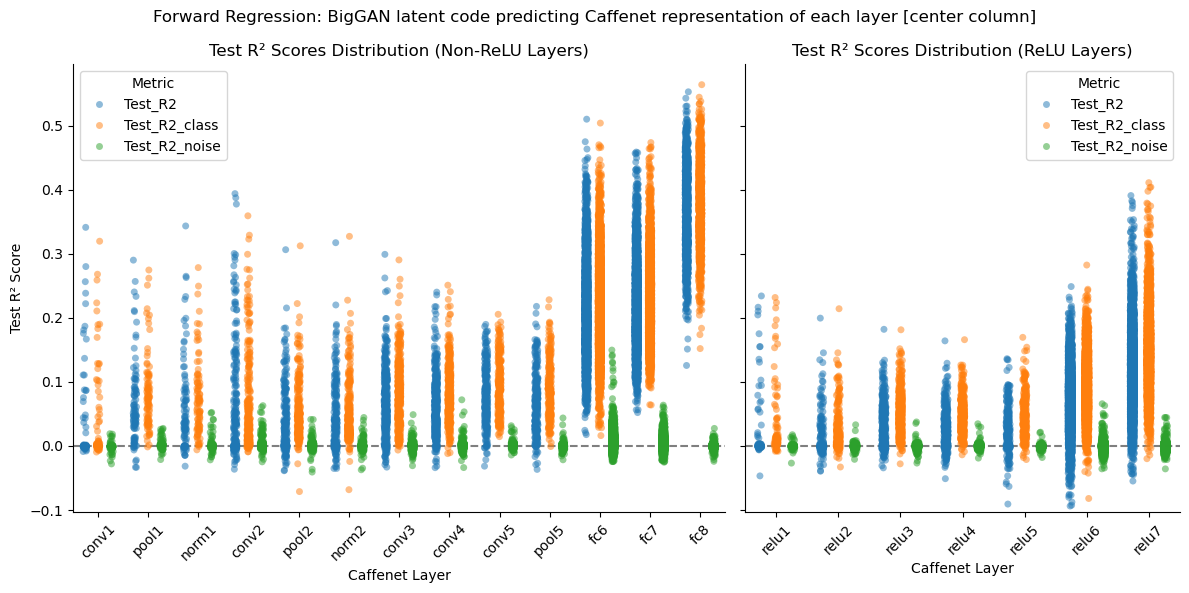

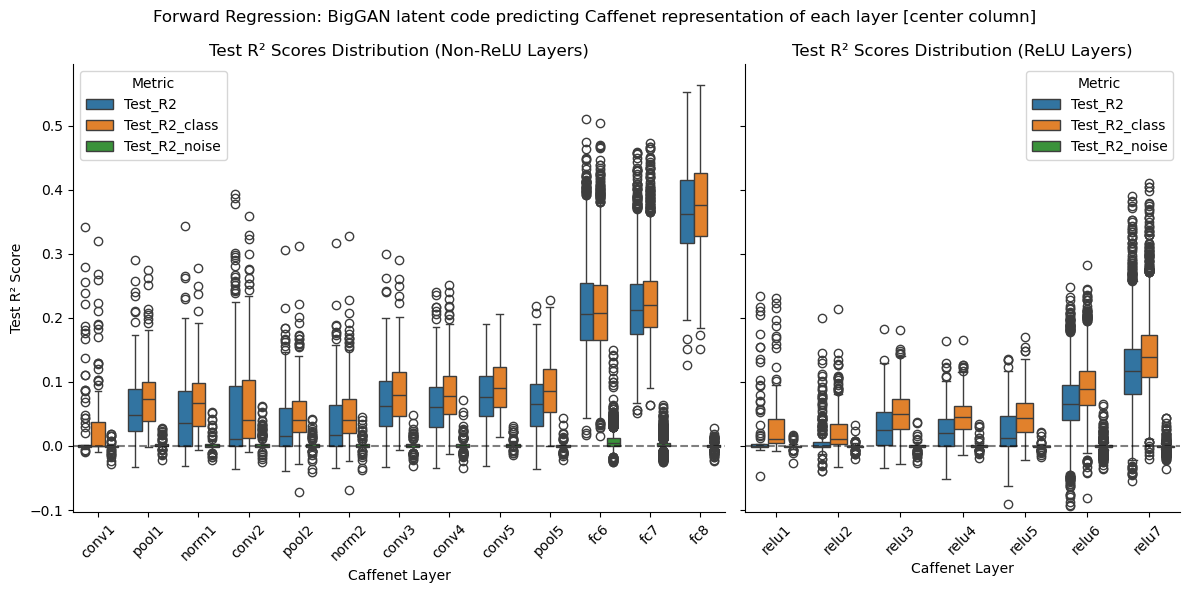

In [16]:
figh = plot_forward_r2_scores_distribution(results_df, plot_type="stripplot", sharey=True);
figh = plot_forward_r2_scores_distribution(results_df, plot_type="boxplot", sharey=True);

### Calculate statistics for Spearman correlations


In [17]:
import numpy as np
from collections import defaultdict
from scipy.stats import spearmanr
from core.utils.GAN_utils import Caffenet

caffenet_model = Caffenet().eval()

In [22]:
# Label layers with their index
layer_to_index = {name: idx for idx, (name, _) in enumerate(caffenet_model.net.named_children())}
index_to_layer = {idx: name for name, idx in layer_to_index.items()}

results_df['Layer_index'] = results_df['Layer'].map(layer_to_index)
results_df['unit_index'] = results_df['Target'].map(lambda x: int(eval(x)[0]))
# Separate non-ReLU and ReLU layers
non_relu_df = results_df.query('not Layer.str.contains("relu")')
relu_df = results_df.query('Layer.str.contains("relu")')
non_relu_df_match_num = results_df.query('not Layer.str.contains("relu") and unit_index < 96')
relu_df_match_num = results_df.query('Layer.str.contains("relu") and unit_index < 96')
non_relu_df_match_num = results_df.query('not Layer.str.contains("relu")').groupby('Layer').sample(n=96).reset_index(drop=True)
relu_df_match_num = results_df.query('Layer.str.contains("relu")').groupby('Layer').sample(n=96).reset_index(drop=True)
# Define R² metrics to analyze
r2_metrics = ['Test_R2', 'Test_R2_class', 'Test_R2_noise']
for df_split, label in zip([non_relu_df_match_num, relu_df_match_num, non_relu_df, relu_df], 
                           ['Non-ReLU Layers (unit number matched)', 'ReLU Layers (unit number matched)', 'Non-ReLU Layers', 'ReLU Layers']):
    print(f"Spearman correlations for {label}:")
    for metric in r2_metrics:
        corr, p_val = spearmanr(df_split['Layer_index'], df_split[metric])
        print(f"{metric}: Spearman correlation = {corr:.3f}, p-value = {p_val:.2e}")


Spearman correlations for Non-ReLU Layers (unit number matched):
Test_R2: Spearman correlation = 0.630, p-value = 1.03e-138
Test_R2_class: Spearman correlation = 0.653, p-value = 1.35e-152
Test_R2_noise: Spearman correlation = 0.110, p-value = 9.67e-05
Spearman correlations for ReLU Layers (unit number matched):
Test_R2: Spearman correlation = 0.529, p-value = 1.21e-49
Test_R2_class: Spearman correlation = 0.606, p-value = 1.53e-68
Test_R2_noise: Spearman correlation = -0.030, p-value = 4.38e-01
Spearman correlations for Non-ReLU Layers:
Test_R2: Spearman correlation = 0.626, p-value = 0.00e+00
Test_R2_class: Spearman correlation = 0.659, p-value = 0.00e+00
Test_R2_noise: Spearman correlation = -0.054, p-value = 7.56e-09
Spearman correlations for ReLU Layers:
Test_R2: Spearman correlation = 0.593, p-value = 0.00e+00
Test_R2_class: Spearman correlation = 0.625, p-value = 0.00e+00
Test_R2_noise: Spearman correlation = -0.043, p-value = 2.96e-05


In [25]:


# Define R² metrics to analyze
r2_metrics = ['Test_R2', 'Test_R2_class', 'Test_R2_noise']

# Initialize storage for correlations and p-values
corr_dict = defaultdict(lambda: defaultdict(list))
pval_dict = defaultdict(lambda: defaultdict(list))
labels = ['Non-ReLU Layers (unit number matched)', 'ReLU Layers (unit number matched)']

for i in range(20):
    non_relu_df_match_num = results_df.query('not Layer.str.contains("relu")').groupby('Layer').sample(n=96).reset_index(drop=True)
    relu_df_match_num = results_df.query('Layer.str.contains("relu")').groupby('Layer').sample(n=96).reset_index(drop=True)
    for df_split, label in zip([non_relu_df_match_num, relu_df_match_num], 
                               ['Non-ReLU Layers (unit number matched)', 'ReLU Layers (unit number matched)']):
        # print(f"Iteration {i+1}: Spearman correlations for {label}:")
        for metric in r2_metrics:
            corr, p_val = spearmanr(df_split['Layer_index'], df_split[metric])
            corr_dict[label][metric].append(corr)
            pval_dict[label][metric].append(p_val)
            # print(f"{metric}: Spearman correlation = {corr:.3f}, p-value = {p_val:.2e}")

# Report mean and SEM of correlations, and the last correlation and p-value
for label in labels:
    print(f"\nMean and SEM of Spearman correlations for {label}:")
    for metric in r2_metrics:
        mean_corr = np.mean(corr_dict[label][metric])
        std_corr = np.std(corr_dict[label][metric], ddof=1) 
        last_corr = corr_dict[label][metric][-1]
        last_pval = pval_dict[label][metric][-1]
        print(f"{metric}: Mean Spearman correlation = {mean_corr:.3f}, SEM = {std_corr:.3f}, Last Spearman correlation = {last_corr:.3f}, p-value = {last_pval:.2e}")



Mean and SEM of Spearman correlations for Non-ReLU Layers (unit number matched):
Test_R2: Mean Spearman correlation = 0.627, SEM = 0.007, Last Spearman correlation = 0.629, p-value = 3.34e-138
Test_R2_class: Mean Spearman correlation = 0.645, SEM = 0.007, Last Spearman correlation = 0.651, p-value = 3.06e-151
Test_R2_noise: Mean Spearman correlation = 0.077, SEM = 0.016, Last Spearman correlation = 0.089, p-value = 1.60e-03

Mean and SEM of Spearman correlations for ReLU Layers (unit number matched):
Test_R2: Mean Spearman correlation = 0.536, SEM = 0.013, Last Spearman correlation = 0.558, p-value = 3.75e-56
Test_R2_class: Mean Spearman correlation = 0.613, SEM = 0.011, Last Spearman correlation = 0.631, p-value = 6.66e-76
Test_R2_noise: Mean Spearman correlation = 0.037, SEM = 0.029, Last Spearman correlation = 0.074, p-value = 5.45e-02


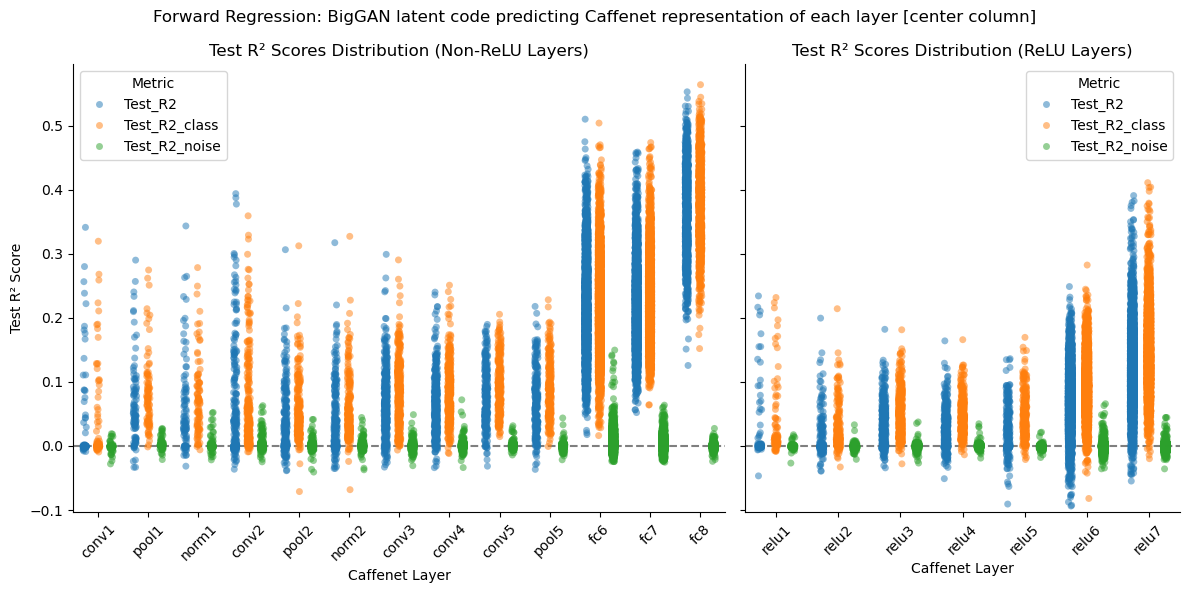

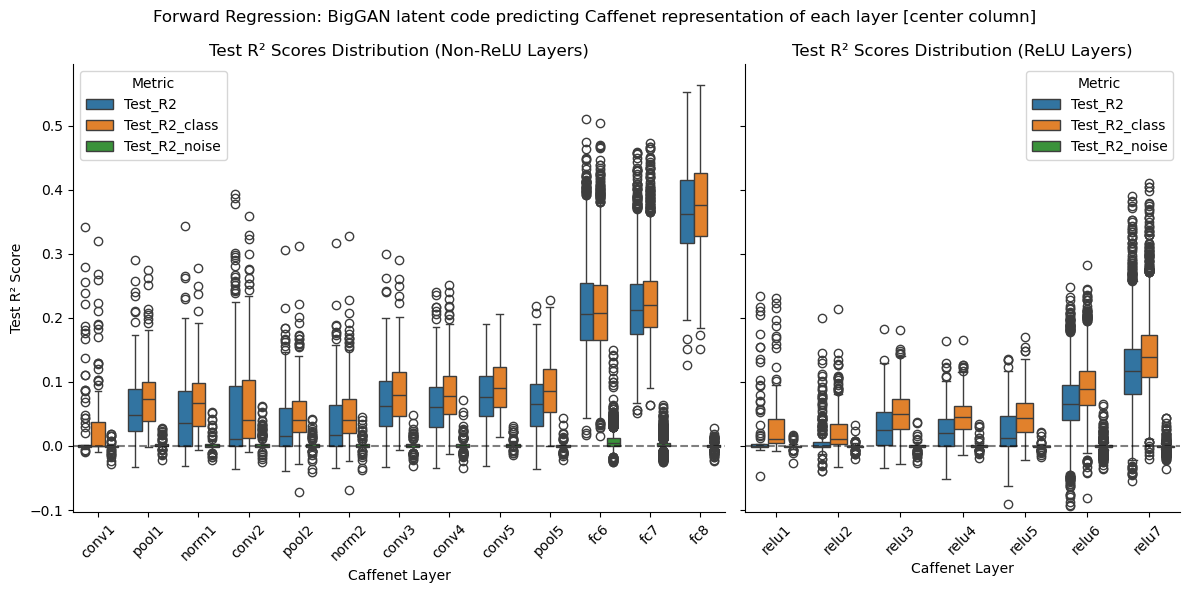

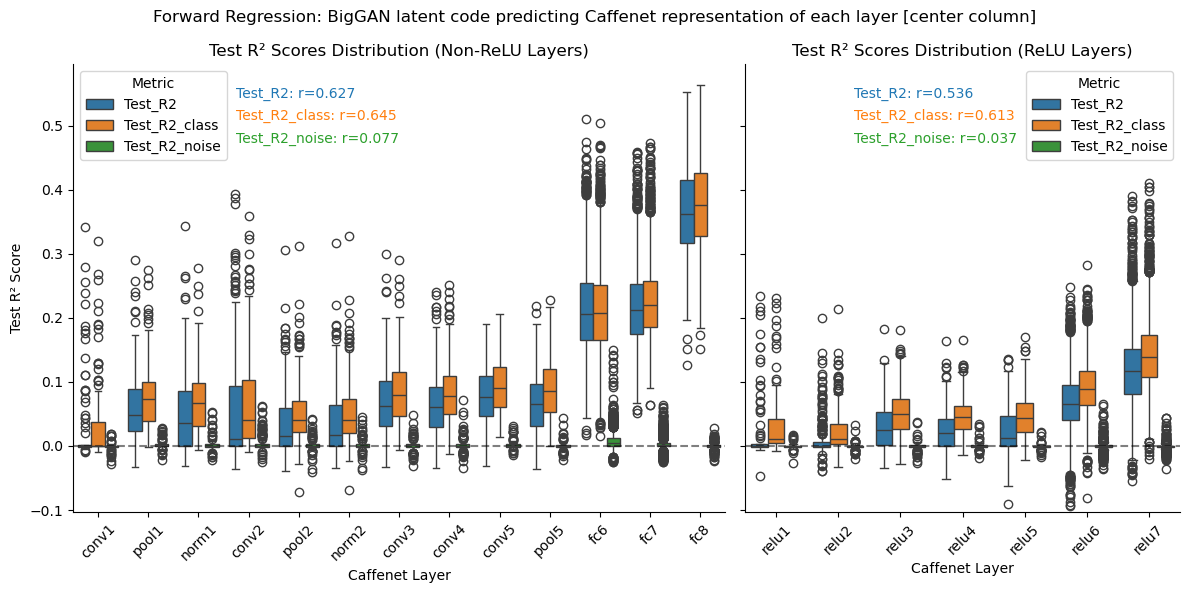

In [40]:
import matplotlib.pyplot as plt

# Define colors for each Test R² metric
metric_colors = {
    'Test_R2': 'C0',
    'Test_R2_class': 'C1',
    'Test_R2_noise': 'C2'
}

# Plot stripplot
figh_strip = plot_forward_r2_scores_distribution(results_df, plot_type="stripplot", sharey=True)
ax1, ax2 = figh_strip.get_axes()
# Add Spearman correlation annotations to boxplot
for ax, label in zip([ax1, ax2], ['Non-ReLU Layers (unit number matched)', 'ReLU Layers (unit number matched)']):
    for metric in ['Test_R2', 'Test_R2_class', 'Test_R2_noise']:
        mean_corr = np.mean(corr_dict[label][metric])
        ax.text(0.25, 0.95 - 0.05*['Test_R2', 'Test_R2_class', 'Test_R2_noise'].index(metric),
                   f"{metric}: r={mean_corr:.3f}", color=metric_colors[metric],
                   transform=ax.transAxes, fontsize=10, verticalalignment='top', )
saveallforms(savedir, "BigGAN_Caffenet_forward_stripplot_with_spearman_corr_annot", figh=figh_strip)
figh_strip

# Plot boxplot
figh_box = plot_forward_r2_scores_distribution(results_df, plot_type="boxplot", sharey=True)
ax1, ax2 = figh_box.get_axes()
# Add Spearman correlation annotations to boxplot
for ax, label in zip([ax1, ax2], ['Non-ReLU Layers (unit number matched)', 'ReLU Layers (unit number matched)']):
    for metric in ['Test_R2', 'Test_R2_class', 'Test_R2_noise']:
        mean_corr = np.mean(corr_dict[label][metric])
        ax.text(0.25, 0.95 - 0.05*['Test_R2', 'Test_R2_class', 'Test_R2_noise'].index(metric),
                   f"{metric}: r={mean_corr:.3f}", color=metric_colors[metric],
                   transform=ax.transAxes, fontsize=10, verticalalignment='top', )
saveallforms(savedir, "BigGAN_Caffenet_forward_boxplot_with_spearman_corr_annot", figh=figh_box)
figh_box




In [29]:
figh_box.get_axes()

[<Axes: title={'center': 'Test R² Scores Distribution (Non-ReLU Layers)'}, xlabel='Caffenet Layer', ylabel='Test R² Score'>,
 <Axes: title={'center': 'Test R² Scores Distribution (ReLU Layers)'}, xlabel='Caffenet Layer', ylabel='Test R² Score'>]

### DeePSim - Caffenet







In [42]:
savedir = r"E:\OneDrive - Harvard University\Manuscript_BigGAN\Figures\insilico_latent_code_linearity\DeePSim_FC6_Caffenet"
results_df = pd.read_csv(join(savedir, "latent_code_linearity_results.csv"))

In [44]:
results_df.columns


Index(['Layer', 'Target', 'Train_R2', 'Test_R2', 'Train_R2_top_Hess512',
       'Test_R2_top_Hess512', 'Train_R2_top_Hess256', 'Test_R2_top_Hess256',
       'Train_R2_top_Hess128', 'Test_R2_top_Hess128', 'Train_R2_null_Hess512',
       'Test_R2_null_Hess512', 'Train_R2_null_Hess256', 'Test_R2_null_Hess256',
       'Train_R2_null_Hess128', 'Test_R2_null_Hess128'],
      dtype='object')

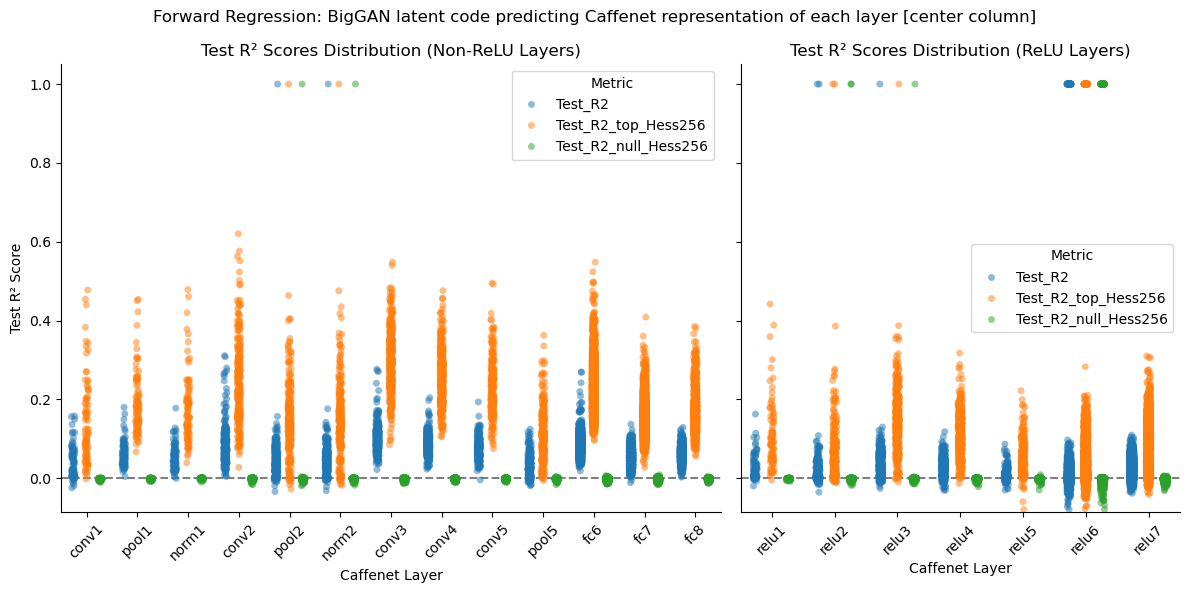

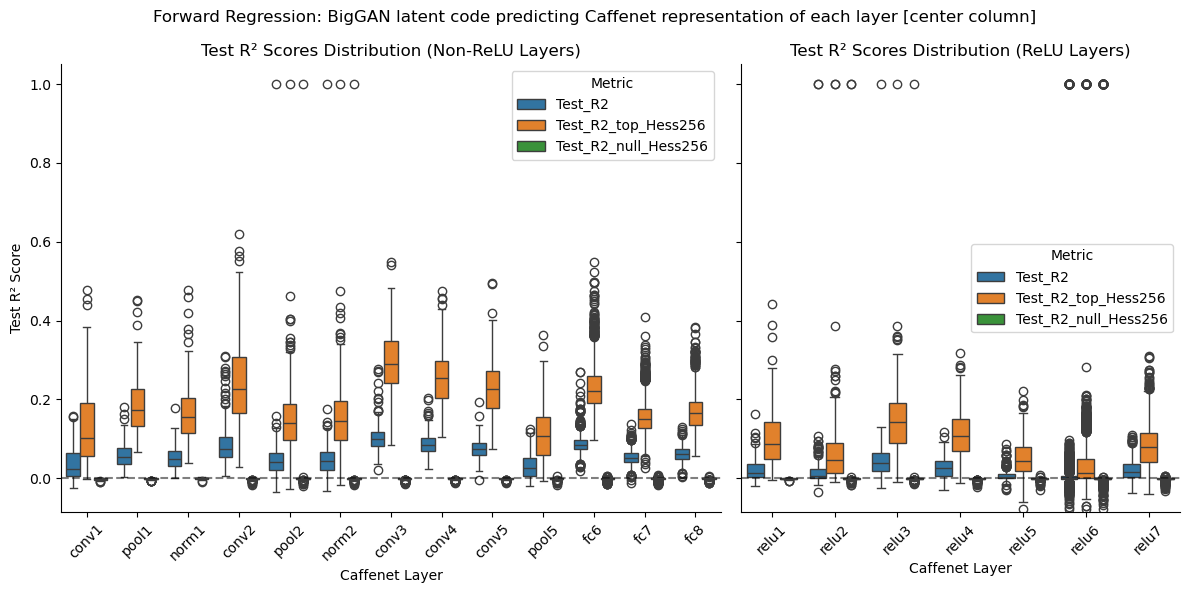

In [47]:
figh = plot_forward_r2_scores_distribution(results_df, plot_type="stripplot", sharey=True, plot_vars=["Test_R2", 'Test_R2_top_Hess256', 'Test_R2_null_Hess256']);
figh = plot_forward_r2_scores_distribution(results_df, plot_type="boxplot", sharey=True, plot_vars=["Test_R2", 'Test_R2_top_Hess256', 'Test_R2_null_Hess256']);

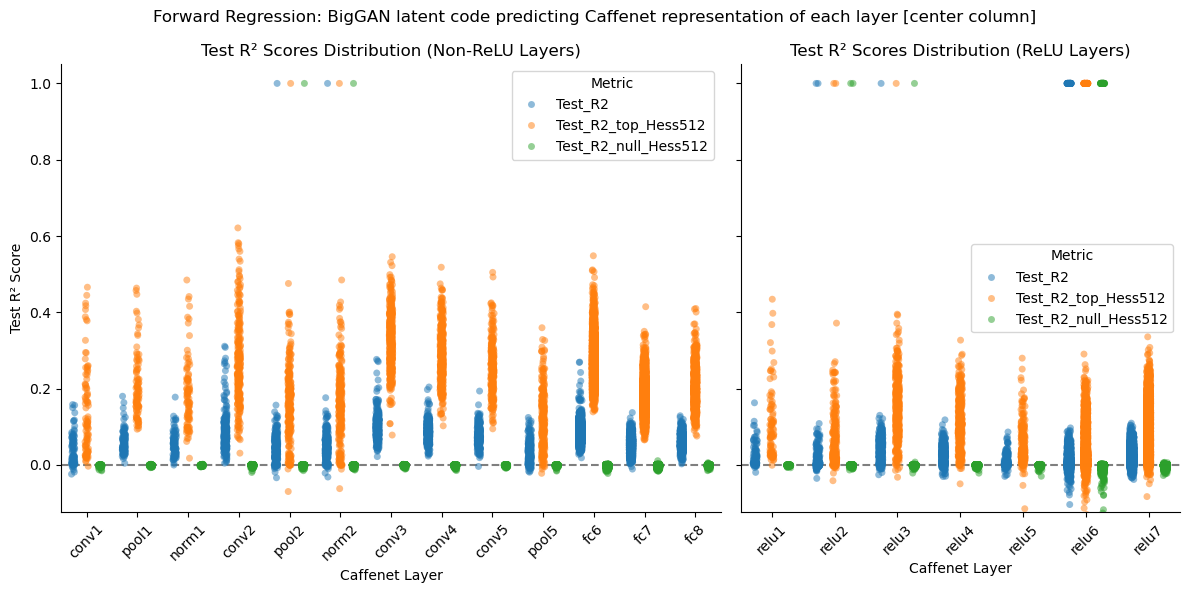

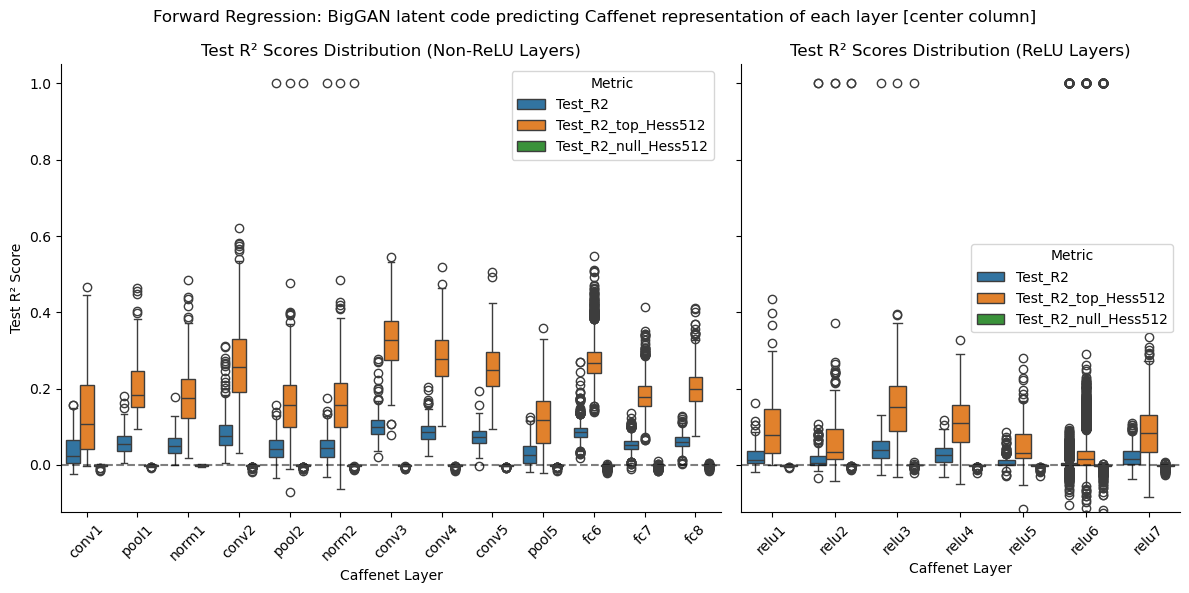

In [59]:
figh = plot_forward_r2_scores_distribution(results_df, plot_type="stripplot", sharey=True, plot_vars=["Test_R2", 'Test_R2_top_Hess512', 'Test_R2_null_Hess512']);
figh = plot_forward_r2_scores_distribution(results_df, plot_type="boxplot", sharey=True, plot_vars=["Test_R2", 'Test_R2_top_Hess512', 'Test_R2_null_Hess512']);


In [56]:
# Label layers with their index
layer_to_index = {name: idx for idx, (name, _) in enumerate(caffenet_model.net.named_children())}
index_to_layer = {idx: name for name, idx in layer_to_index.items()}

results_df['Layer_index'] = results_df['Layer'].map(layer_to_index)
results_df['unit_index'] = results_df['Target'].map(lambda x: x if isinstance(x, int) else int(eval(x)[0]))
# Separate non-ReLU and ReLU layers
non_relu_df = results_df.query('not Layer.str.contains("relu")')
relu_df = results_df.query('Layer.str.contains("relu")')

non_relu_df_match_num = results_df.query('not Layer.str.contains("relu") and unit_index < 96')
relu_df_match_num = results_df.query('Layer.str.contains("relu") and unit_index < 96')
non_relu_df_match_num = results_df.query('not Layer.str.contains("relu")').groupby('Layer').sample(n=96).reset_index(drop=True)
relu_df_match_num = results_df.query('Layer.str.contains("relu")').groupby('Layer').sample(n=96).reset_index(drop=True)
# Define R² metrics to analyze
r2_metrics = ["Test_R2", 'Test_R2_top_Hess256', 'Test_R2_null_Hess256']
for df_split, label in zip([non_relu_df_match_num, relu_df_match_num, non_relu_df, relu_df], 
                           ['Non-ReLU Layers (unit number matched)', 'ReLU Layers (unit number matched)', 'Non-ReLU Layers', 'ReLU Layers']):
    print(f"Spearman correlations for {label}:")
    for metric in r2_metrics:
        corr, p_val = spearmanr(df_split['Layer_index'], df_split[metric])
        print(f"{metric}: Spearman correlation = {corr:.3f}, p-value = {p_val:.2e}")


Spearman correlations for Non-ReLU Layers (unit number matched):
Test_R2: Spearman correlation = 0.151, p-value = 9.09e-08
Test_R2_top_Hess256: Spearman correlation = 0.070, p-value = 1.29e-02
Test_R2_null_Hess256: Spearman correlation = 0.110, p-value = 9.39e-05
Spearman correlations for ReLU Layers (unit number matched):
Test_R2: Spearman correlation = -0.168, p-value = 1.17e-05
Test_R2_top_Hess256: Spearman correlation = -0.216, p-value = 1.49e-08
Test_R2_null_Hess256: Spearman correlation = 0.056, p-value = 1.47e-01
Spearman correlations for Non-ReLU Layers:
Test_R2: Spearman correlation = -0.335, p-value = 7.10e-300
Test_R2_top_Hess256: Spearman correlation = -0.382, p-value = 0.00e+00
Test_R2_null_Hess256: Spearman correlation = 0.059, p-value = 2.61e-10
Spearman correlations for ReLU Layers:
Test_R2: Spearman correlation = 0.182, p-value = 3.75e-72
Test_R2_top_Hess256: Spearman correlation = 0.190, p-value = 3.67e-78
Test_R2_null_Hess256: Spearman correlation = 0.009, p-value = 

In [60]:
# Define R² metrics to analyze
r2_metrics = ["Test_R2", 'Test_R2_top_Hess512', 'Test_R2_top_Hess256', 'Test_R2_null_Hess512', 'Test_R2_null_Hess256']


# Initialize storage for correlations and p-values
corr_dict = defaultdict(lambda: defaultdict(list))
pval_dict = defaultdict(lambda: defaultdict(list))
labels = ['Non-ReLU Layers (unit number matched)', 'ReLU Layers (unit number matched)']

for i in range(50):
    non_relu_df_match_num = results_df.query('not Layer.str.contains("relu")').groupby('Layer').sample(n=96).reset_index(drop=True)
    relu_df_match_num = results_df.query('Layer.str.contains("relu")').groupby('Layer').sample(n=96).reset_index(drop=True)
    for df_split, label in zip([non_relu_df_match_num, relu_df_match_num], 
                               ['Non-ReLU Layers (unit number matched)', 'ReLU Layers (unit number matched)']):
        # print(f"Iteration {i+1}: Spearman correlations for {label}:")
        for metric in r2_metrics:
            corr, p_val = spearmanr(df_split['Layer_index'], df_split[metric])
            corr_dict[label][metric].append(corr)
            pval_dict[label][metric].append(p_val)
            # print(f"{metric}: Spearman correlation = {corr:.3f}, p-value = {p_val:.2e}")

# Report mean and SEM of correlations, and the last correlation and p-value
for label in labels:
    print(f"\nMean and SEM of Spearman correlations for {label}:")
    for metric in r2_metrics:
        mean_corr = np.mean(corr_dict[label][metric])
        std_corr = np.std(corr_dict[label][metric], ddof=1) 
        last_corr = corr_dict[label][metric][-1]
        last_pval = pval_dict[label][metric][-1]
        print(f"{metric}: Mean Spearman correlation = {mean_corr:.3f}, STD = {std_corr:.3f}, Last Spearman correlation = {last_corr:.3f}, p-value = {last_pval:.2e}")



Mean and SEM of Spearman correlations for Non-ReLU Layers (unit number matched):
Test_R2: Mean Spearman correlation = 0.127, STD = 0.011, Last Spearman correlation = 0.120, p-value = 2.31e-05
Test_R2_top_Hess512: Mean Spearman correlation = 0.122, STD = 0.011, Last Spearman correlation = 0.121, p-value = 1.69e-05
Test_R2_top_Hess256: Mean Spearman correlation = 0.059, STD = 0.012, Last Spearman correlation = 0.050, p-value = 7.76e-02
Test_R2_null_Hess512: Mean Spearman correlation = 0.109, STD = 0.019, Last Spearman correlation = 0.089, p-value = 1.69e-03
Test_R2_null_Hess256: Mean Spearman correlation = 0.111, STD = 0.017, Last Spearman correlation = 0.100, p-value = 4.08e-04

Mean and SEM of Spearman correlations for ReLU Layers (unit number matched):
Test_R2: Mean Spearman correlation = -0.148, STD = 0.030, Last Spearman correlation = -0.165, p-value = 1.74e-05
Test_R2_top_Hess512: Mean Spearman correlation = -0.177, STD = 0.027, Last Spearman correlation = -0.206, p-value = 6.92e-

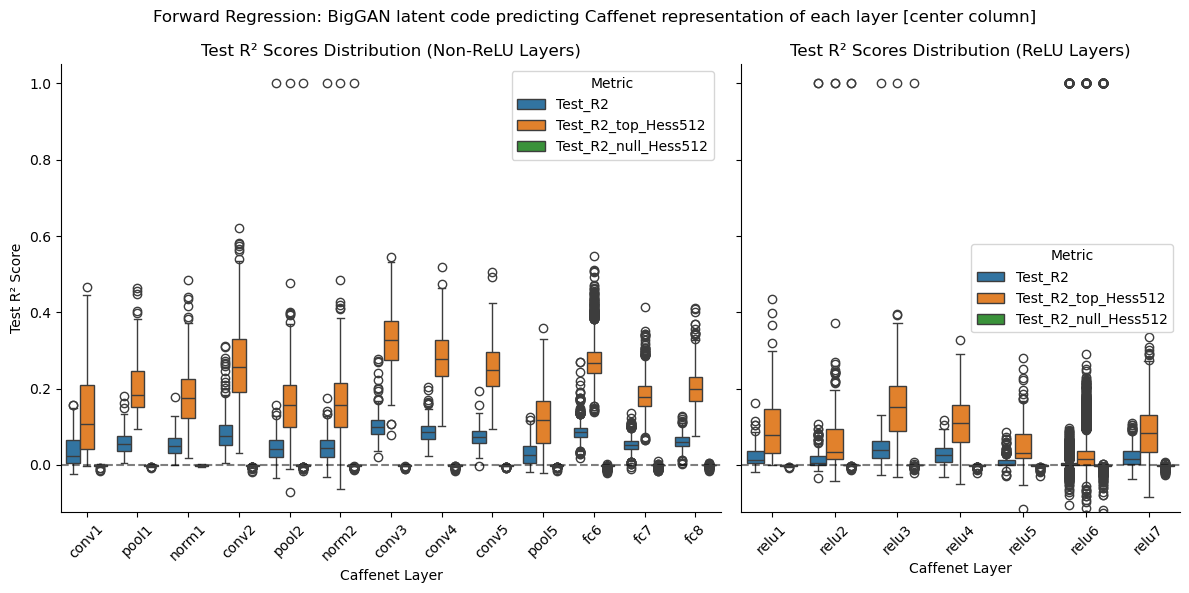

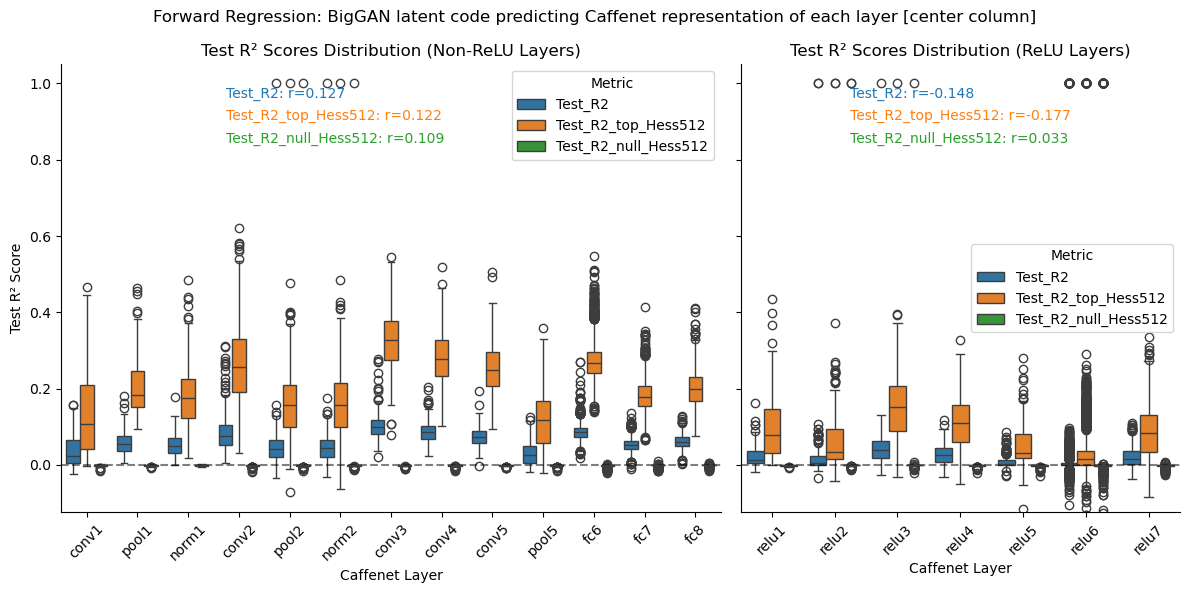

In [62]:
# figh = plot_forward_r2_scores_distribution(results_df, plot_type="stripplot", sharey=True, plot_vars=["Test_R2", 'Test_R2_top_Hess512', 'Test_R2_null_Hess512']);
figh_box = plot_forward_r2_scores_distribution(results_df, plot_type="boxplot", sharey=True, plot_vars=["Test_R2", 'Test_R2_top_Hess512', 'Test_R2_null_Hess512']);
ax1, ax2 = figh_box.get_axes()
# Add Spearman correlation annotations to boxplot
for ax, label in zip([ax1, ax2], ['Non-ReLU Layers (unit number matched)', 'ReLU Layers (unit number matched)']):
    for mi, metric in enumerate(['Test_R2', 'Test_R2_top_Hess512', 'Test_R2_null_Hess512']):
        mean_corr = np.mean(corr_dict[label][metric])
        ax.text(0.25, 0.95 - 0.05*mi, f"{metric}: r={mean_corr:.3f}", color=f"C{mi}",
                   transform=ax.transAxes, fontsize=10, verticalalignment='top', )
# saveallforms(savedir, "DeePSim_Caffenet_forward_boxplot_with_spearman_corr_annot", figh=figh_box)
figh_box